# QCTO - Workplace Module

### Project Title: Analyzing Medical Malpractice Claims: Identifying Trends and Risk Factors
#### Done By: Motshabi Mohola

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of this project is to analyze a comprehensive dataset of medical malpractice claims to identify trends, risk factors, and correlations between various variables. The goal is to provide insights that can help reduce the frequency and severity of medical malpractice claims, ultimately contributing to improved patient outcomes and reduced healthcare costs.

* **Details:** 
    
    - Background and Significance:

Medical malpractice claims are a significant concern in the healthcare industry, resulting in substantial financial costs and emotional distress for patients, families, and healthcare providers. According to recent studies, the annual cost of medical malpractice in the United States is estimated to be $55.6 billion, accounting for 2.4% of annual healthcare spending. Furthermore, a staggering 7.4% of physicians licensed in the US face malpractice claims each year.

    - Research Questions:

This project aims to address the following research questions:

1. What are the most common specialties and procedures associated with medical malpractice claims?
2. Are there any correlations between claim severity, patient age, and physician specialty?
3. Do patients represented by private attorneys tend to receive higher claim payments?
4. Are there any differences in claim outcomes based on patient demographics, such as gender and marital status?


By exploring these questions and analyzing the dataset, this project seeks to provide valuable insights that can inform healthcare policy, medical practice, and patient safety initiatives.

---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** 
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [299]:
import pandas as pd #loading the dataset
import matplotlib.pyplot as plt #ploting graphs
import seaborn as sns
import numpy as np #mathematical calculations
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split #spliting the data
from sklearn.linear_model import LinearRegression, Ridge , Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

**Purpose**
The purpose of this dataset is to provide a comprehensive collection of medical malpractice claims.

**Sources**
The data was downloaded from Kaggle, a popular platform for data science competitions and hosting datasets.
Link [https://www.kaggle.com/datasets/gabrielsantello/medical-malpractice-insurance-dataset?resource=download]

**Dataset Description**
The dataset contains 79,210 records of medical malpractice claims.

**Size and Scope**
The dataset includes claims from various sources, with a focus on medical malpractice cases.

Types of Data
The dataset contains a mix of numerical and categorical.
- Amount: Numerical
- Severity: Numerical (ordinal, 1 = emotional trauma, 9 = death, it's represented as numerical values)
- Age: Numerical
- Private Attorney: its represented as integer (will be later fixed) but its Categorical (binary, 1 (Yes) and 0 (No))
- Marital Status: its represented as integer (will later be fixed) but its Categorical (ordinal, 2 ( likely "Married") and 1 (likely "Single"))
- Specialty: object
- Insurance: object
- Gender: object
    
The dataset includes the following variables:

- claim_id: Unique identifier for each claim
- specialty: Specialty of the physician
- state: State where the claim was filed
- year: Year the claim was filed
- claim_amount: Amount of the claim
- severity: Severity of the injury
- outcome: Outcome of the claim


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [9]:
#load the dataset
df = pd.read_csv('medicalmalpractice.csv')
#display the first few rows
print(df.head())


   Amount  Severity  Age  Private Attorney  Marital Status        Specialty  \
0   57041         7   62                 1               2  Family Practice   
1  324976         6   38                 1               2            OBGYN   
2  135383         4   34                 1               2       Cardiology   
3  829742         7   42                 1               1       Pediatrics   
4  197675         3   60                 0               2            OBGYN   

           Insurance  Gender  
0            Private    Male  
1       No Insurance  Female  
2            Unknown    Male  
3       No Insurance  Female  
4  Medicare/Medicaid  Female  


In [11]:
# concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            79210 non-null  int64 
 1   Severity          79210 non-null  int64 
 2   Age               79210 non-null  int64 
 3   Private Attorney  79210 non-null  int64 
 4   Marital Status    79210 non-null  int64 
 5   Specialty         79210 non-null  object
 6   Insurance         79210 non-null  object
 7   Gender            79210 non-null  object
dtypes: int64(5), object(3)
memory usage: 4.8+ MB


In [13]:
# descriptive statistics for numeric columns
print(df.describe())

              Amount      Severity           Age  Private Attorney  \
count   79210.000000  79210.000000  79210.000000      79210.000000   
mean   157484.554816      4.799659     42.701868          0.660889   
std    193135.093293      2.083439     19.811063          0.473411   
min      1576.000000      1.000000      0.000000          0.000000   
25%     43670.250000      3.000000     28.000000          0.000000   
50%     98131.000000      4.000000     43.000000          1.000000   
75%    154675.250000      7.000000     58.000000          1.000000   
max    926411.000000      9.000000     87.000000          1.000000   

       Marital Status  
count    79210.000000  
mean         1.889559  
std          1.002502  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          4.000000  


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [17]:
# check for missing values
df.isnull().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

The dataset has no missing values.

In [19]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers for each numerical column
outlier_counts = {}
numerical_columns = ["Amount", "Severity", "Age", "Private Attorney" , "Marital Status"]

for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

outlier_counts

{'Amount': 10540,
 'Severity': 0,
 'Age': 0,
 'Private Attorney': 0,
 'Marital Status': 10362}

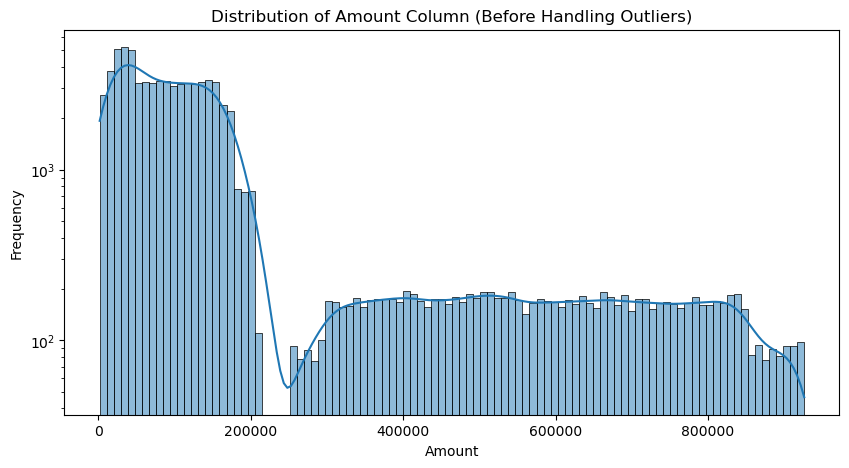

In [21]:
# Plot distribution of "Amount" column
plt.figure(figsize=(10,5))
sns.histplot(df["Amount"], bins=100, kde=True)
plt.title("Distribution of Amount Column (Before Handling Outliers)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.yscale("log")  # Log scale to better visualize skewed data
plt.show()

In [113]:
# key statistics
mean_amount = df["Amount"].mean()
print(mean_amount)

median_amount = df["Amount"].median()
print(median_amount)

157486.34432955852
98132.0


In [25]:
# finding the 99th percentile value in the Amount column
percentile_99 = df["Amount"].quantile(0.99)
print(percentile_99)

847620.55


In [27]:
# check the highest values to check for outliers in the Amount Column
print(df["Amount"].nlargest(10))

36698    926411
12406    926359
14461    926014
49558    925964
35823    925802
34590    925722
70166    925700
50464    925639
7154     925509
21906    925430
Name: Amount, dtype: int64


The 99th percentile is 847 620.55, meaning the highest 1% of cases have payouts above this value. The top 10 highest values are all above 925 000, with some reaching 926 411. These values are not drastically different from the 99th percentile, so they might be legitimate high claims rather than data errors. I want to keep meaningful data therefore I will set all values above 847 620 to 847 620 to reduce extreme skewness while keeping major variations preventing large claims from distorting the analysis.

In [29]:
# cap at 99th percentile
df["Amount_Capped"] = df["Amount"].clip(upper=847620.55)

In [31]:
# Check unique values and counts of Marital Status
print(df["Marital Status"].value_counts())

Marital Status
2    41220
1    22802
4    10362
0     3832
3      994
Name: count, dtype: int64


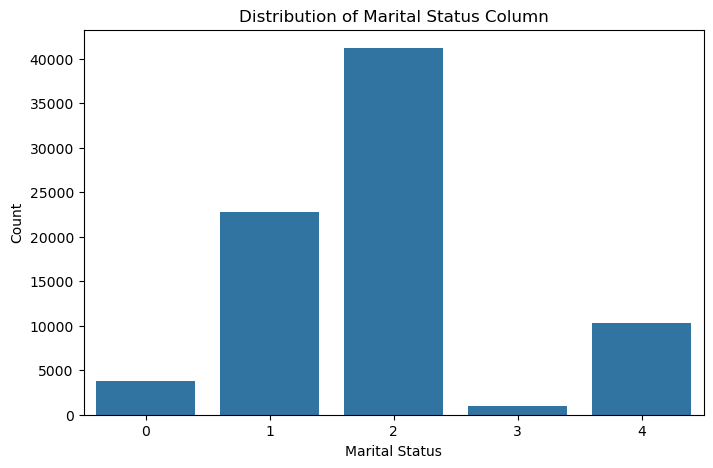

In [33]:
# plot the distribution
plt.figure(figsize=(8,5))
sns.barplot(x=df["Marital Status"].value_counts().index, 
            y=df["Marital Status"].value_counts().values)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Distribution of Marital Status Column")
plt.show()

since both Private Attorney and Marital Status are set to int, we can convert to categoral which will prevent any issues for future use.


In [35]:
# Marital Status from integer to categoral
df["Marital Status"] = df["Marital Status"].astype("category")
# Private Attorney from integer to categoral
df["Private Attorney"] = df["Private Attorney"].astype("category")


In [37]:
# data type of each column
print(df.dtypes)

Amount                 int64
Severity               int64
Age                    int64
Private Attorney    category
Marital Status      category
Specialty             object
Insurance             object
Gender                object
Amount_Capped        float64
dtype: object


The values in Marital Status column are now categoral with each number representing the following: 0- single, 1-married, 2-divorced, 3-widowed, 4-separated. The values in Private Attorney are also now categoral with 1 meaning Yes and 0 meaning No.

In [39]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(duplicate_count)

1


In [41]:
# Remove duplicates
df = df.drop_duplicates()

In [43]:
# Return the number of duplicates removed and the new dataset shape
duplicate_count, df.shape

(1, (79209, 9))

In [45]:
# Normalize Age
scaler = StandardScaler()
df["Age_Scaled"] = scaler.fit_transform(df[["Age"]])

In [ ]:
Now the data has been centered and mean = 0 and standard deviation = 1.

In [47]:
# make Severity into ordinal
df['Severity'] = pd.Categorical(df['Severity'], categories=[1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=True)

making the "Severity" column ordinal, the computer now knows that:
- These numbers aren't just random values
- They have a specific order that matters(1 being the lowest severity and 9 being the highest severity)

In [49]:
# data type of each column
print(df.dtypes)

Amount                 int64
Severity            category
Age                    int64
Private Attorney    category
Marital Status      category
Specialty             object
Insurance             object
Gender                object
Amount_Capped        float64
Age_Scaled           float64
dtype: object


In [51]:
#feature extraction
# Age Binning
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 30, 50, 100], labels=["Young", "Middle-aged", "Senior"])

Instead of treating age as a continuous number, grouping it into Young, Middle-aged, and Senior helps capture different risk patterns.

In [53]:
print(df)

       Amount Severity  Age Private Attorney Marital Status  \
0       57041        7   62                1              2   
1      324976        6   38                1              2   
2      135383        4   34                1              2   
3      829742        7   42                1              1   
4      197675        3   60                0              2   
...       ...      ...  ...              ...            ...   
79205   25305        4   64                1              2   
79206   43098        3   87                0              4   
79207   35398        3   81                0              4   
79208  154228        9   19                0              4   
79209  168298        7    4                1              1   

                Specialty          Insurance  Gender  Amount_Capped  \
0         Family Practice            Private    Male        57041.0   
1                   OBGYN       No Insurance  Female       324976.0   
2              Cardiology     

In [55]:
# Check amount distribution
print(df["Amount_Capped"].value_counts(normalize=True))

Amount_Capped
847620.55    0.010011
55030.00     0.000076
123971.00    0.000076
30346.00     0.000076
155608.00    0.000063
               ...   
121182.00    0.000013
92060.00     0.000013
56381.00     0.000013
7065.00      0.000013
168298.00    0.000013
Name: proportion, Length: 66908, dtype: float64


The dataset does not seem balanced because it doesnt have roughly equal proportions across the amounts. Amount_Capped has a large number of unique values (66,908), each with a very small proportion. If this is your target variable, it suggests a highly imbalanced distribution, possibly a long-tail effect where a few values dominate while most occur rarely. Amount_Capped has many unique values, its a regresssion problem. 

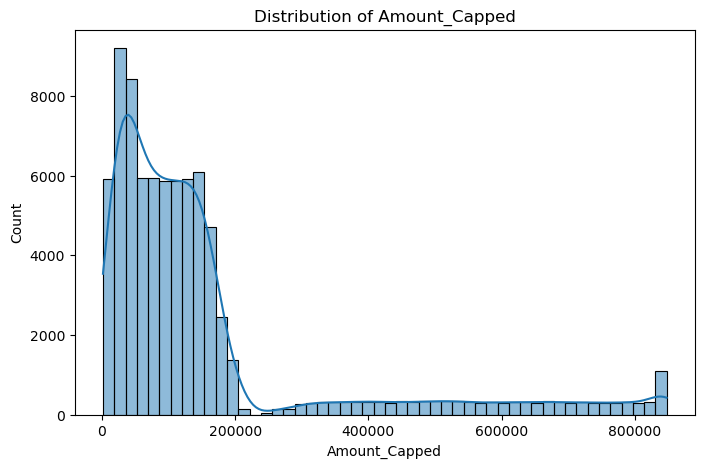

In [57]:
# check the skewness of Amount_Capped
plt.figure(figsize=(8, 5))
sns.histplot(df["Amount_Capped"], bins=50, kde=True)
plt.title("Distribution of Amount_Capped")
plt.show()

Amount_Capped is highly skewed, applying a log transformation to help normalise the distribution

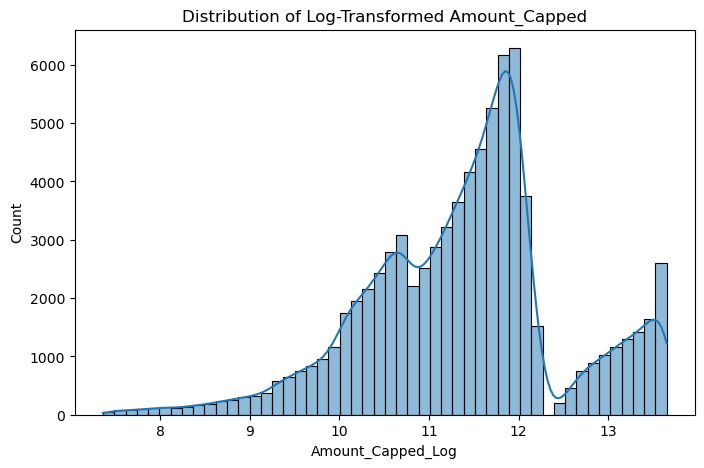

In [125]:
# Apply log transformation (adding 1 to avoid log(0) issues)
df["Amount_Capped_Log"] = np.log1p(df["Amount_Capped"])

# check new distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Amount_Capped_Log"], bins=50, kde=True)
plt.title("Distribution of Log-Transformed Amount_Capped")
plt.show()


The transformation has reduced skewness, making the distribution more normal-like compared to the original data.
There are still peaks and uneven density, meaning some value ranges occur more frequently than others.
The data is now more manageable for regression models, as extreme values are compressed.

In [127]:
print(df)

       Amount Severity  Age Private Attorney Marital Status  \
0       57041        7   62                1              2   
1      324976        6   38                1              2   
2      135383        4   34                1              2   
3      829742        7   42                1              1   
4      197675        3   60                0              2   
...       ...      ...  ...              ...            ...   
79205   25305        4   64                1              2   
79206   43098        3   87                0              4   
79207   35398        3   81                0              4   
79208  154228        9   19                0              4   
79209  168298        7    4                1              1   

                Specialty          Insurance  Gender  Amount_Capped  \
0         Family Practice            Private    Male        57041.0   
1                   OBGYN       No Insurance  Female       324976.0   
2              Cardiology     

In [129]:
# handle data leakages
X = df.drop(['Amount', 'Amount_Capped', 'Amount_Capped_Log'], axis=1)
y = df['Amount_Capped_Log']

In [133]:
print(X.columns.tolist())

['Severity', 'Age', 'Private Attorney', 'Marital Status', 'Specialty', 'Insurance', 'Gender', 'Age_Scaled', 'Age_Group']


In [189]:
#spliting the data
# Define the feature matrix (X) and the target variable (y)
X = df.drop('Amount_Capped_Log', axis=1)
y = df['Amount_Capped_Log']

# Encode categorical features
X = pd.get_dummies(X)

# Split the data into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame (important for naming features)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns) # maintaining feature names after scaling
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


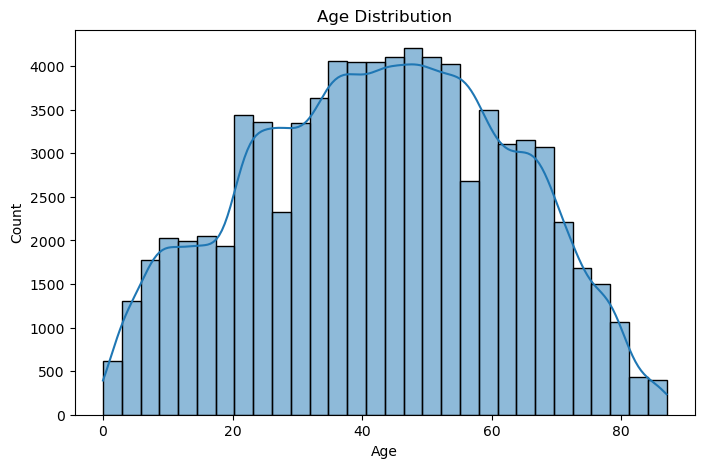

In [137]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

The age graph is almost normally distributed, meaning:
1. most patients fall around the central age
2. fewer young and old patients file claims
3. predictability - meaning malpractice claims follow a common, natural trend
4. potential insights:
   - middle-aged patients are likely to file claims
   - younger or older patients either experience fewer issues or are less likely to pursue legal action

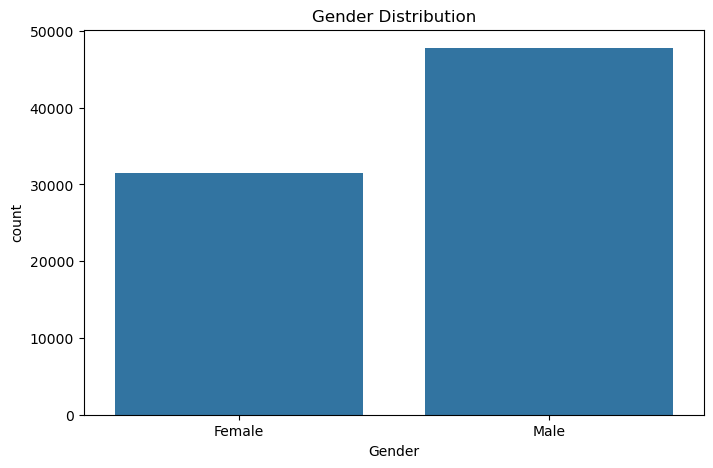

In [139]:
# Gender Count
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Gender"])
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.title("Gender Distribution")
plt.show()

1. More male patients file for malpractice claims
2. potential insights:
   - more male patients fall sick more often, putting them in hospital and therefore exposed to risks of medical malpractice

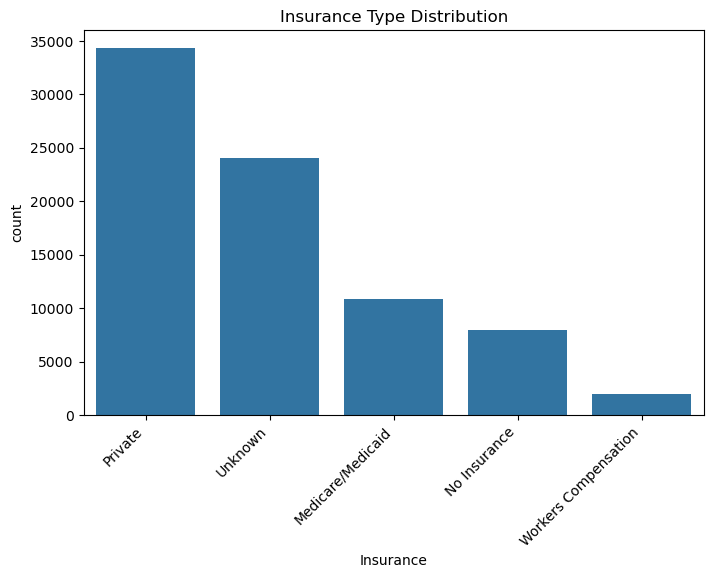

In [141]:
# Insurance Type Count
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Insurance"], order=df["Insurance"].value_counts().index)
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.title("Insurance Type Distribution")
plt.show()

1. Private insurance is the most common among malpractice claims, making up the largest portion.
2. A significant number of cases have Unknown insurance status, which could indicate missing or unreported data.
3. Medicare/Medicaid and No Insurance have moderate claim counts, while Workers' Compensation cases are the least common.
4. Potential insights:
   - insured patients are more likely to file claims or that private insurers are more involved in malpractice payouts.
   - workers compensation is very low because work-related medical claims follow a different legal process or that these cases are underreported.
   - A large number of cases have "Unknown" insurance. This could mean incomplete data entry or a lack of access to patient records.

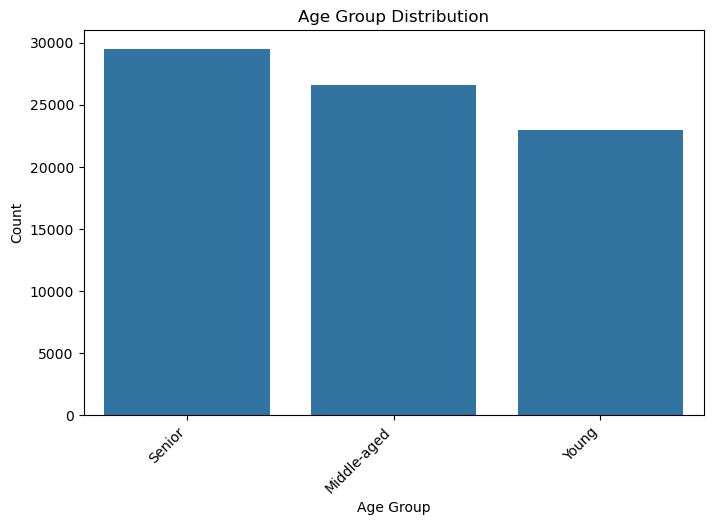

In [143]:
# Age Group Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Age_Group"], order=df["Age_Group"].value_counts().index)
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotate labels if needed
plt.show()

1. The majority of medical malpractice claims come from senior patients, followed by middle-aged, and lastly young patients.
2. Potential insights:
    - Older individuals might be more prone to medical complications, leading to a higher number of claims.
    - Younger individuals might have fewer medical procedures or are less likely to pursue legal action.
    - Medical practitioners should pay extra attention to elderly patients to minimize malpractice risks.

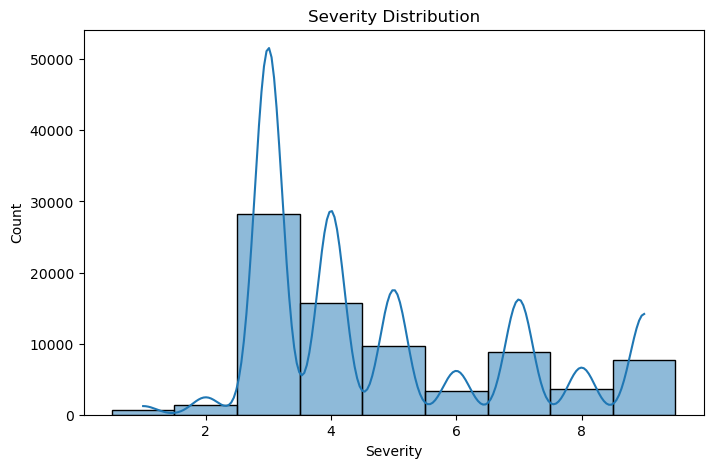

In [145]:
# Severity Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Severity"], bins=10, kde=True)
plt.title("Severity Distribution")
plt.show()


1. The severity scores show a multi-modal (bumpy) distribution with multiple peaks.
2. The most common severity levels are around 3, 4, and 6.
3. There are some low-frequency but high-severity cases (severity 8 and 9).
4. Potential insights:
    - Different severity categories could be tied to specific types of malpractice incidents.
    - Patients might categorize incidents into specific severity levels based on hospital/legal guidelines.
    - Investigating the factors behind high-severity cases could help hospitals reduce extreme claims.
    - The distribution suggests that medical errors don’t follow a simple pattern—there are multiple risk factors at play.

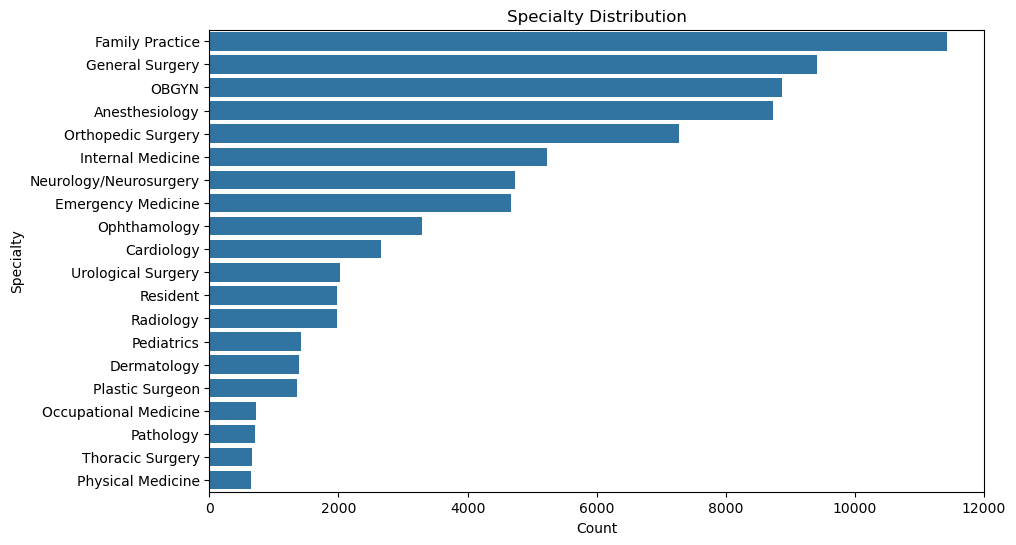

In [147]:
# Specialty Count
plt.figure(figsize=(10, 6))
sns.countplot(y=df["Specialty"], order=df["Specialty"].value_counts().index)  # Horizontal bar plot
plt.title("Specialty Distribution")
plt.xlabel("Count")
plt.ylabel("Specialty")
plt.show()


1. Key Insights:

    - Family Practice is the most common specialty, significantly outnumbering others.
    - General Surgery, OBGYN, Anesthesiology, and Orthopedic Surgery also have high representation.
    - Physical Medicine, Thoracic Surgery, and Pathology have the lowest numbers.
    - This suggests that generalist fields (e.g., Family Practice, Internal Medicine) are more prevalent, while specialized fields (e.g., Thoracic Surgery, Occupational Medicine) are less common.

2. Implications:

The high number of Family Practice doctors suggests a strong focus on primary care.
The relatively low numbers in some surgical fields could indicate a potential shortage in those specialties.

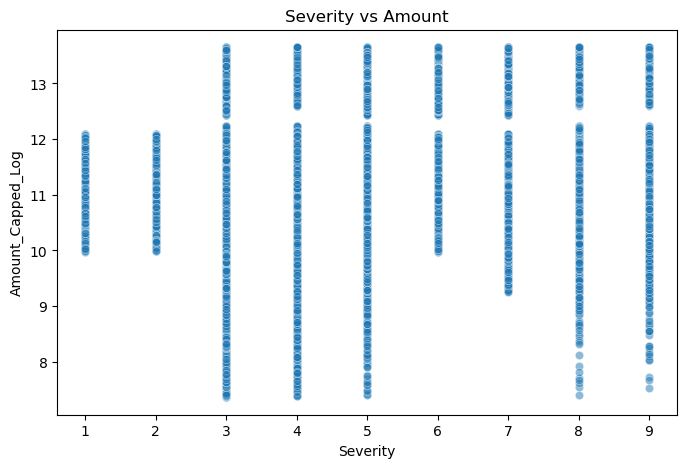

In [149]:
# Scatter plot of Severity vs Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Severity"], y=df["Amount_Capped_Log"], alpha=0.5)
plt.title("Severity vs Amount")
plt.show()

1. Higher Claim Activity in Severities 3–5 and 8–9:
    - These levels exhibit more frequent claims and higher payout amounts.
    - Severity 3–5: Likely involve significant harm (e.g. surgical errors, misdiagnoses) requiring costly treatments or litigation.
    - Severity 8–9: Likely tied to catastrophic outcomes (e.g. permanent disability, death), triggering large settlements due to long-term care costs or punitive damages.

2. Lower Claim Activity in Severities 1–2:
    - Fewer claims and smaller payouts, suggesting minor harm (e.g. temporary injuries).
    - Possible Factors: Underreporting, quick out-of-court settlements, or legal caps on low-severity claims.

3. Outliers in Low Severities:
    - Even severity 1–2 cases occasionally result in high payouts, indicating hidden risks (e.g. prevention reputational damage, aggressive legal strategies).

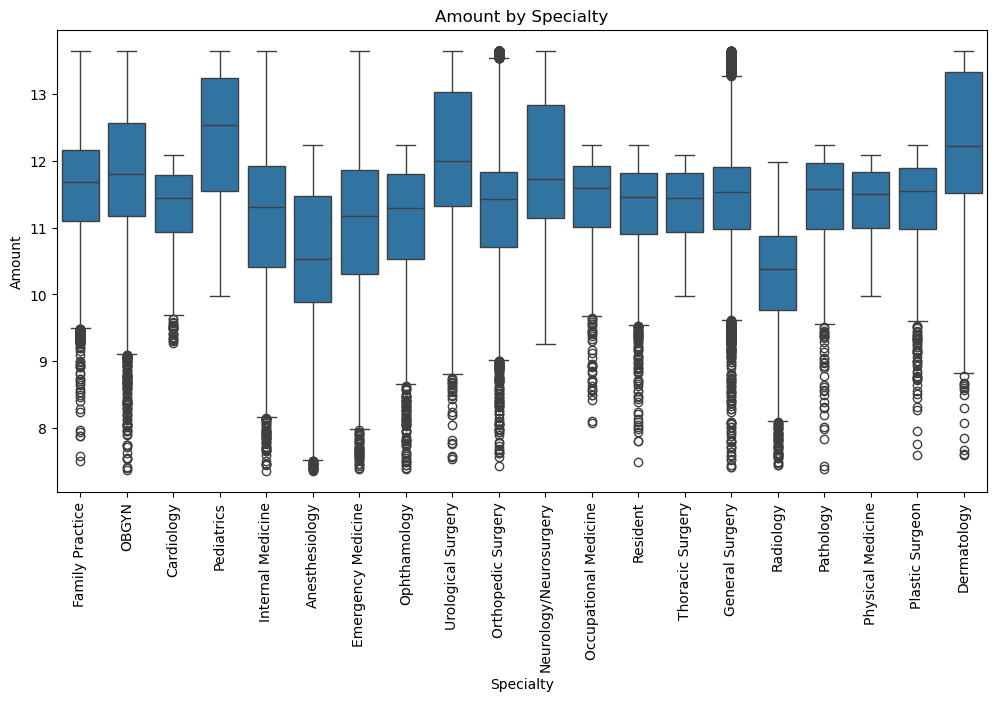

In [151]:
# Boxplot of Specialty vs Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Specialty"], y=df["Amount_Capped_Log"])
plt.xticks(rotation=90)
plt.title("Amount by Specialty")
plt.xlabel("Specialty")
plt.ylabel("Amount")
plt.show()

1. High-Risk Specialties (Likely Higher Claims):
    - OBSYN (Obstetrics/Gynecology)
    - Cardiology
    - Neurology/Neurosurgery
    - Orthopedic Surgery
    - Urological Surgery
    - Emergency Medicine
Common drivers: High-stakes procedures, surgical errors, or complications with severe outcomes.

2. Moderate-Risk Specialties:
    - Internal Medicine
    - General Surgery
    - Thoracic Surgery
    - Anesthesiology
Potential factors: Complex diagnostics, perioperative risks, or chronic disease management.

3. Lower-Risk Specialties:
    - Pediatrics
    - Occupational Medicine
    - Physical Medicine (e.g., Dermatology, Plastic Surgery)
    - Radiology/Pathology
Possible reasons: Fewer invasive procedures, lower litigation rates, or standardized protocols.

4. Implications:
    - Surgical and high-intervention specialties dominate higher claim amounts.
    - Non-surgical specialties (e.g., Radiology, Dermatology) show lower financial exposure.
    - Risk management should prioritize specialties like OBSYN, Neurosurgery, and Emergency Medicine.

# Boxplot of Insurance Type vs Amount
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Insurance"], y=df["Amount_Capped_Log"])
plt.xticks(rotation=45)
plt.title("Amount by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Amount")
plt.show()

1. Highest Claim Amounts:
    - Private Insurance (13): Likely driven by:
        - Higher-cost procedures (e.g., surgeries, specialized care) covered under private plans.
        - Patients with private insurance may pursue larger claims due to better legal representation or reimbursement expectations.
    - No Insurance (12): High claims may reflect uninsured patients seeking compensation for catastrophic out-of-pocket medical costs.

Moderate/Lower Claim Amounts:
    - Medicare/Medicaid (10): Lower due to standardized reimbursement rates, caps on damages, or older/sicker patient populations with limited litigation.
    - Workers Compensation (8–9): Lowest due to regulated payouts for workplace injuries and less severe malpractice scenarios.

Data Gaps:
    - Unknown Insurance (11): Suggests incomplete records, which could obscure trends or inflate averages if unresolved cases are high-value.

Implications for Malpractice Risk Management:
    - Private Insurance Focus: Providers serving privately insured patients may face elevated financial risk; prioritize safeguards for high-cost specialties (e.g., surgery).
    - Uninsured Patients: High claims highlight systemic gaps in healthcare access; consider proactive resolution to avoid prolonged litigation.
    - Government Programs: Lower claim amounts may reflect cost controls but could mask underreported issues in vulnerable populations.
    - Workers Compensation: Stable payouts indicate effective risk protocols; maintain compliance to sustain low claim trends.

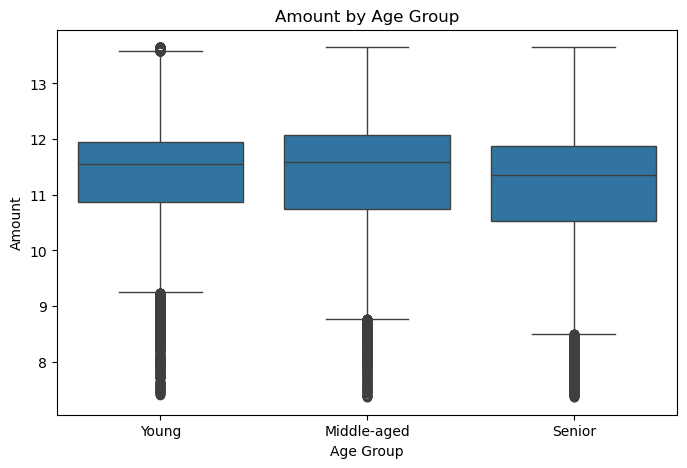

In [155]:
# Boxplot of Age Group vs Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Age_Group"], y=df["Amount_Capped_Log"])
plt.title("Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Amount")
plt.show()

1. Highest Claim Amounts:
    - Young Patients (13): Highest malpractice claim amounts, potentially due to:
        - Longer life expectancy requiring lifelong care for injuries.
        - Higher economic damages (e.g., lost wages, future earnings).
    - Middle-Aged Patients (12): Slightly lower than young patients but still significant, possibly reflecting peak earning years and complex medical needs.

2. Lower Claim Amounts for Seniors (11):
    - May correlate with shorter life expectancy, reduced economic damages, or caps on non-economic damages (e.g., pain and suffering) for older patients.

3. Trend Implications:
    - Claims decrease with age, suggesting younger patients pose higher financial risk.
    - Seniors’ lower amounts may also reflect underreporting or systemic biases in valuing elderly claims.

4. Potential Drivers:
    - Young Patients: Catastrophic injuries (e.g., birth-related malpractice) leading to long-term costs.
    - Middle-Aged Patients: Surgical errors or misdiagnoses impacting career and family responsibilities.
    - Seniors: Focus on palliative care or limited legal pursuit of claims.

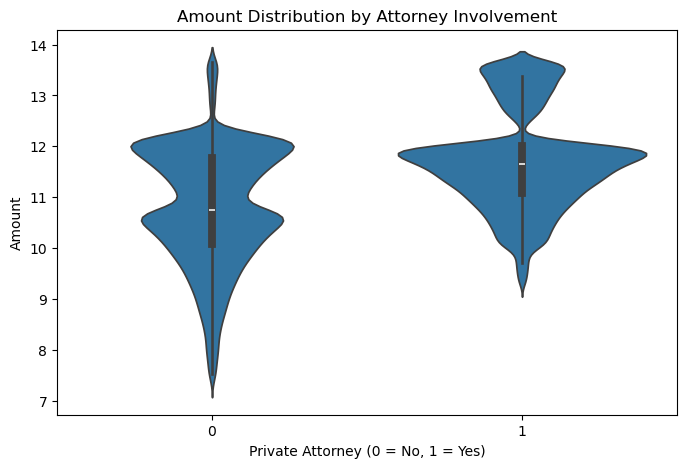

In [157]:
# Attorney Involvement vs Amount
plt.figure(figsize=(8, 5))
sns.violinplot(x=df["Private Attorney"], y=df["Amount_Capped_Log"])
plt.title("Amount Distribution by Attorney Involvement")
plt.xlabel("Private Attorney (0 = No, 1 = Yes)")
plt.ylabel("Amount")
plt.show()

1. significant Increase in Claim Amounts with Private Attorney Involvement:
    - No Private Attorney (0): Lowest claim amounts (7), likely due to quicker settlements, weaker negotiation leverage, or lower case complexity.
    - Private Attorney Involved (1): Highest claim amounts (14), nearly double the non-attorney cases, suggesting aggressive legal strategies, higher case merit, or severe malpractice outcomes.

2. Drivers of Higher Payouts with Attorneys:
    - Private attorneys may pursue larger damages (e.g., punitive, economic, or long-term care costs).
    - Attorneys likely target high-value cases with strong evidence or catastrophic harm.

3. Implications for Plaintiffs and Insurers:
    - Plaintiffs: Hiring a private attorney significantly boosts potential compensation.
    - Insurers/Defendants: Cases with attorney involvement require robust legal defenses and risk higher financial exposure.

4. Potential Confounding Factors:
    - Severe or complex cases may inherently attract private attorneys and justify higher payouts, complicating causality.
    - Possible selection bias (attorneys choose winnable, high-reward cases).

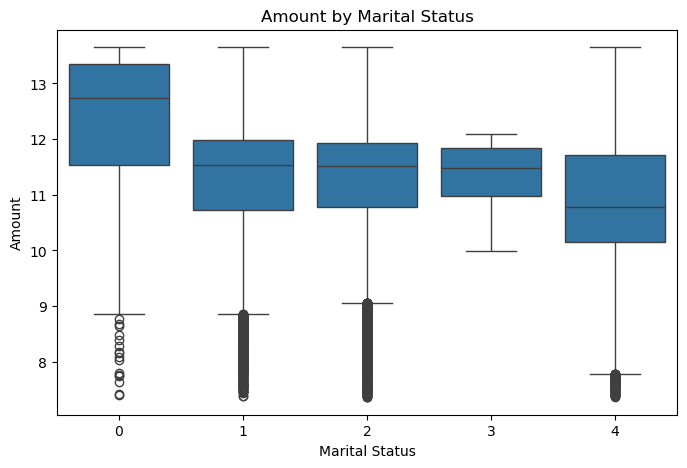

In [159]:
# Boxplot of Marital Status vs Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Marital Status"], y=df["Amount_Capped_Log"])
plt.title("Amount by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Amount")
plt.show()

1. Higher Claim Amounts for Single Individuals (Status 0):
    - Marital status "0" (likely single/unmarried) has the highest claim amount (13), suggesting unmarried individuals may pursue larger settlements due to:
        - Lack of shared financial responsibilities (e.g., no spousal income).
        - Greater reliance on compensation for lost wages or long-term care.

2. Decline in Claims with Marital Status 1–4:
    - Married (status 1) and other statuses (divorced, widowed, etc.) show lower amounts (12 to 8), possibly due to:
        - Shared insurance coverage or family support reducing financial desperation.
        - Legal strategies targeting single individuals for higher payouts.

3. Implications:
    - Insurers may face higher risks with unmarried claimants

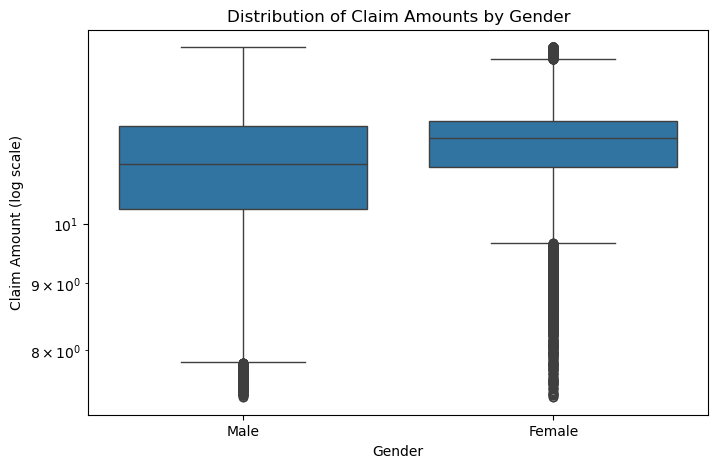

In [161]:
# Gender vs Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Amount_Capped_Log", data=df)
plt.yscale("log")  # Log scale to handle outliers
plt.title("Distribution of Claim Amounts by Gender")
plt.xlabel("Gender")
plt.ylabel("Claim Amount (log scale)")
plt.show()

1. Males Have Slightly Higher Claims (9 vs. 8 on log scale):
    - Males show marginally higher claim amounts (9 x 10⁰ ≈ 9) compared to females (8 x 10⁰ ≈ 8).

2. Possible Drivers:
    - Higher-risk occupations or procedures among males (e.g., construction injuries, surgical specialties).

    - Differences in litigation behavior or perceived economic damages (e.g., lost wages).

3. Outlier at 10¹:
    - A small subset of claims for both genders reaches significantly higher amounts (10¹), likely reflecting catastrophic cases (e.g., permanent disability, wrongful death).

4.Implications:
    - Gender alone is a weak predictor

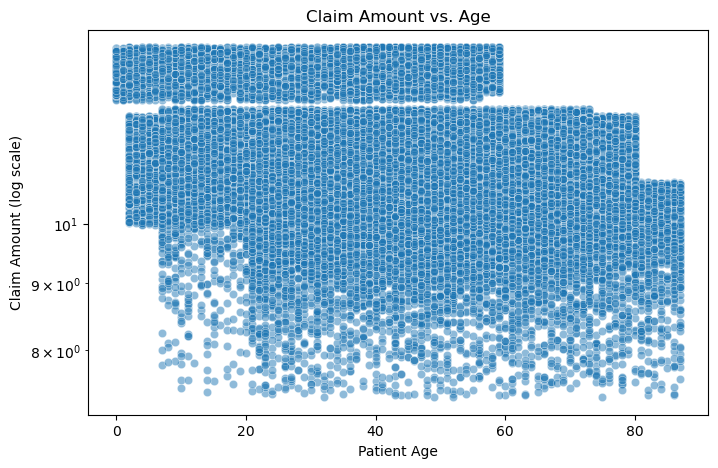

In [163]:
# Age vs Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Age", y="Amount_Capped_Log", data=df, alpha=0.5)
plt.yscale("log")  # Log scale for better visualization
plt.title("Claim Amount vs. Age")
plt.xlabel("Patient Age")
plt.ylabel("Claim Amount (log scale)")
plt.show()

1. The claim amounts are spread across all age groups.
2. The log scale reveals that claims tend to cluster into two distinct bands, possibly due to policy caps or insurance limits.
3. Younger and older individuals both exhibit a wide range of claim amounts, with no clear age-based trend.
4. There is a high density of claims at different levels, indicating that claim amounts are not necessarily correlated with age.

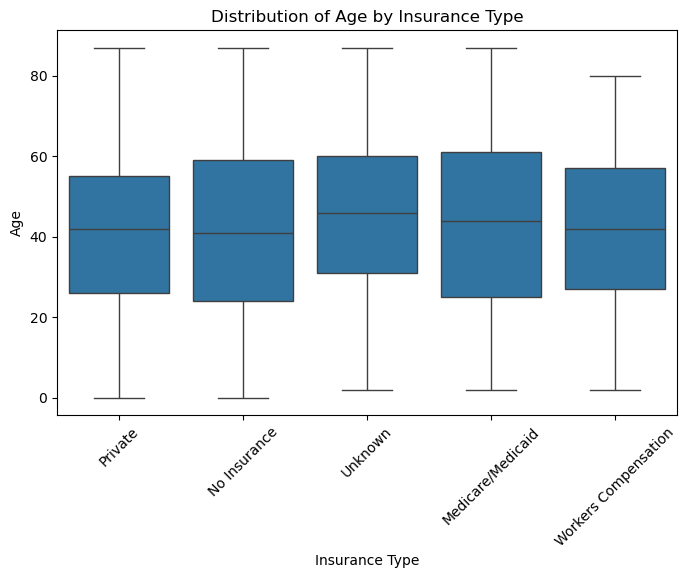

In [165]:
# age and insurance
plt.figure(figsize=(8, 5))
sns.boxplot(x="Insurance", y="Age", data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Distribution of Age by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Age")
plt.show()

1. The boxplot shows the age distribution for different types of insurance.
2. The median age appears to be similar across all insurance types.
3. The interquartile range (IQR) for each category is quite broad, indicating a diverse age range within each insurance type.
4. Medicare/Medicaid has a slightly higher median age, which makes sense as these programs primarily serve older individuals.
5. No significant outliers are evident, meaning age distributions are relatively normal across insurance types.
6. Insights:
    - Patients with Medicare/Medicaid tend to be older.
    - Private insurance and No insurance categories have a more balanced age distribution.
    - Workers' Compensation insurance covers a wide range of ages, suggesting workplace injuries occur across all age groups.

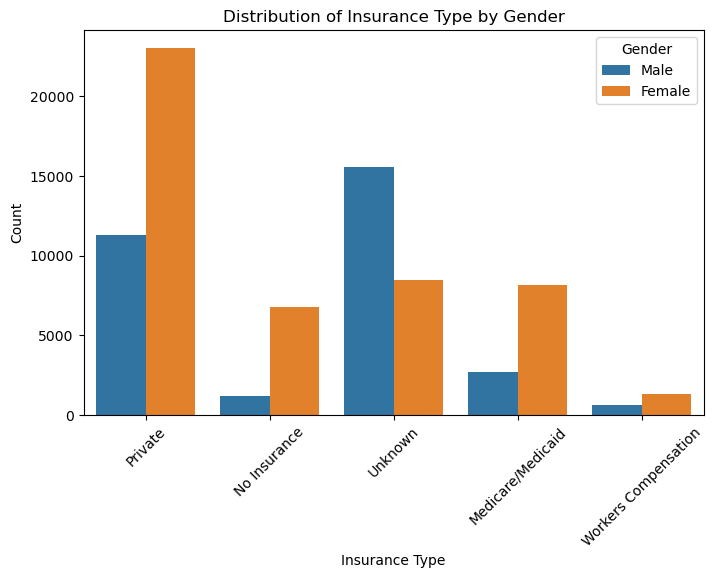

In [167]:
# gender and insurance
plt.figure(figsize=(8, 5))
sns.countplot(x="Insurance", hue="Gender", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Insurance Type by Gender")
plt.xlabel("Insurance Type")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

key insights:
    - Private insurance dominates for both genders.
    - Males slightly outnumber females in "No Insurance" and "Workers Compensation," while females have higher counts in "Medicare/Medicaid" (common for caregiving roles or older demographics).

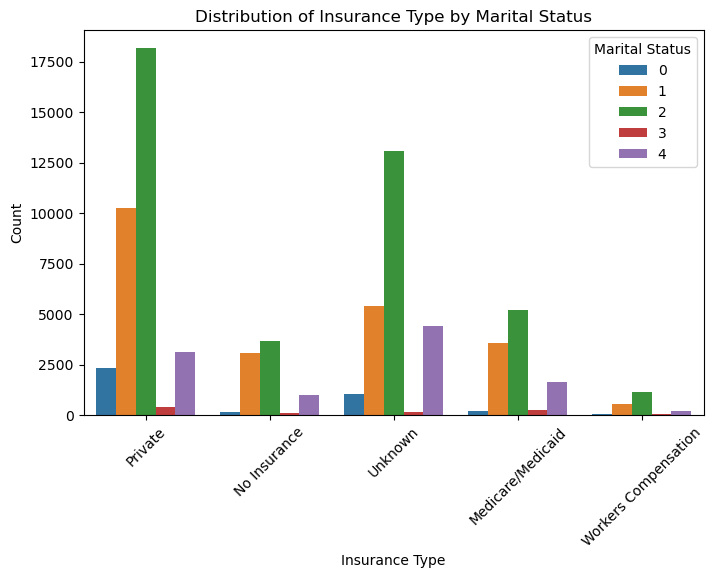

In [169]:
# marital status and insurance
plt.figure(figsize=(8, 5))
sns.countplot(x="Insurance", hue="Marital Status", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Insurance Type by Marital Status")
plt.xlabel("Insurance Type")
plt.ylabel("Count")
plt.legend(title="Marital Status")
plt.show()

In [ ]:
Key Insight:
    - Marital status "0" (likely single) has the highest "No Insurance" count.
    - Status "1" (likely married) leads in private insurance, suggesting financial stability.

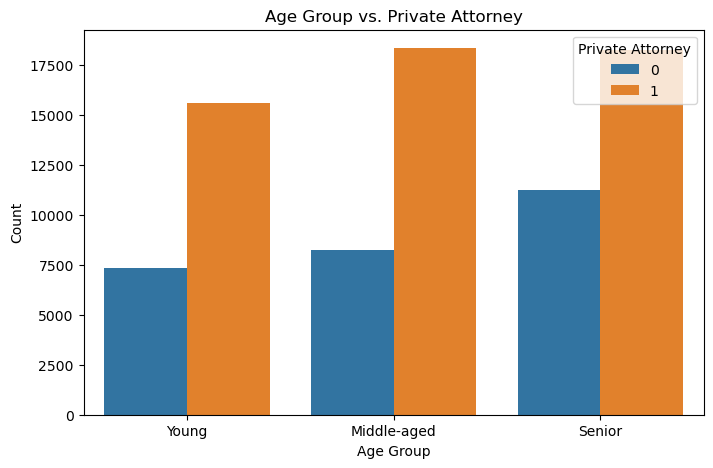

In [171]:
# age group and private attorney
plt.figure(figsize=(8, 5))
sns.countplot(x="Age_Group", hue="Private Attorney", data=df)
plt.title("Age Group vs. Private Attorney")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Private Attorney")
plt.show()

In [ ]:
Key Insight:
    - Middle-aged/Senior individuals use private attorneys more frequently than younger groups.
    - Significant disparity in legal representation by age, possibly due to financial capacity or claim complexity.

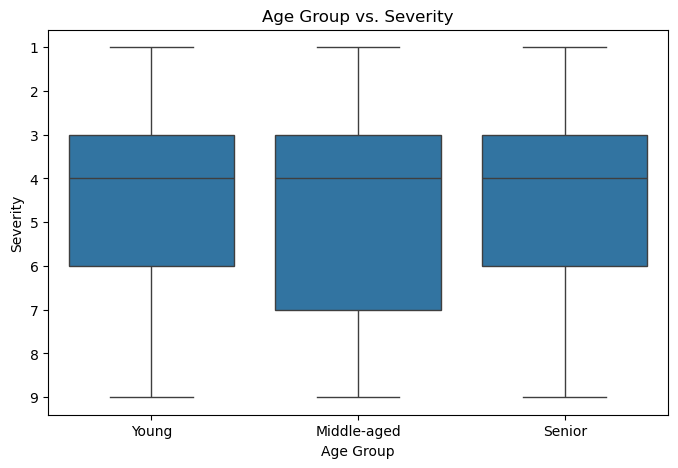

In [173]:
# age group vs severity
plt.figure(figsize=(8, 5))
sns.boxplot(x="Age_Group", y="Severity", data=df)
plt.title("Age Group vs. Severity")
plt.xlabel("Age Group")
plt.ylabel("Severity")
plt.show()

In [ ]:
1. The plot compares the severity of cases among three age groups: Young, Middle-aged, and Senior.
2. The middle-aged group appears to have the highest median severity and the widest range of severity values.
3. Young and senior groups have similar distributions with slightly lower median severity levels.
4. The middle-aged group may have more extreme severity cases, as suggested by the larger spread.
5. Insights:
    - Middle-aged individuals may be at higher risk for severe conditions or injuries, possibly due to workplace stress, lifestyle, or underlying health issues.
    - Young and senior groups might have more stable severity distributions, though still experiencing serious cases.

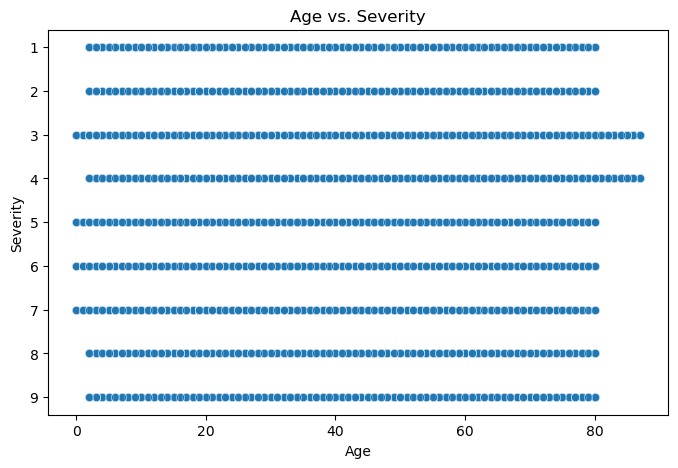

In [175]:
# age and severity
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Age", y="Severity", data=df, alpha=0.6)
plt.title("Age vs. Severity")
plt.xlabel("Age")
plt.ylabel("Severity")
plt.show()

Key insights:
    - Severity values are uniformly distributed across different age groups, suggesting no clear trend or correlation between age and severity.
    - This could indicate that severity is independent of age, or the dataset may require further analysis to detect subtle trends.

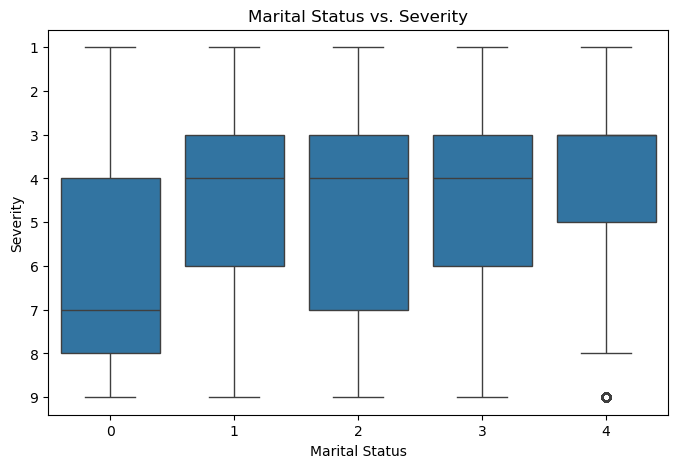

In [177]:
# marital status and severity 
plt.figure(figsize=(8, 5))
sns.boxplot(x="Marital Status", y="Severity", data=df)
plt.title("Marital Status vs. Severity")
plt.xlabel("Marital Status")
plt.ylabel("Severity")
plt.show()

1. The marital status categories are encoded numerically (0–4), and the severity of cases varies across these groups.
2. The 0 category (possibly single or widowed individuals) has the highest median severity and a broader range.
3. Other groups (1–4) have similar median severity levels, but category 4 has a few outliers.
4. There is a clear variation in severity depending on marital status.
5. Insights:
    - Individuals in category 0 might be more vulnerable to severe cases. This could be due to lack of family support, financial constraints, or stress.
    - Other marital status groups have less variability, which might indicate that support systems or lifestyle differences impact health outcomes.

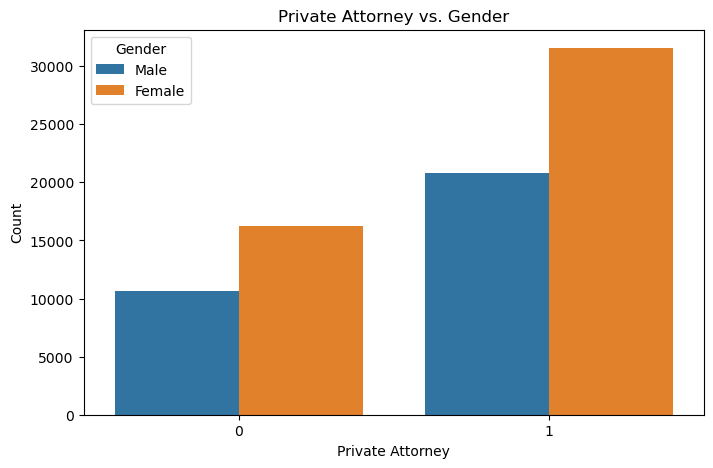

In [179]:
# private attorney and gender
plt.figure(figsize=(8, 5))
sns.countplot(x="Private Attorney", hue="Gender", data=df)
plt.title("Private Attorney vs. Gender")
plt.xlabel("Private Attorney")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

Key Insight:
    - Males use private attorneys more than females. Could reflect occupational risks (e.g., males in high-risk jobs) or claim types.

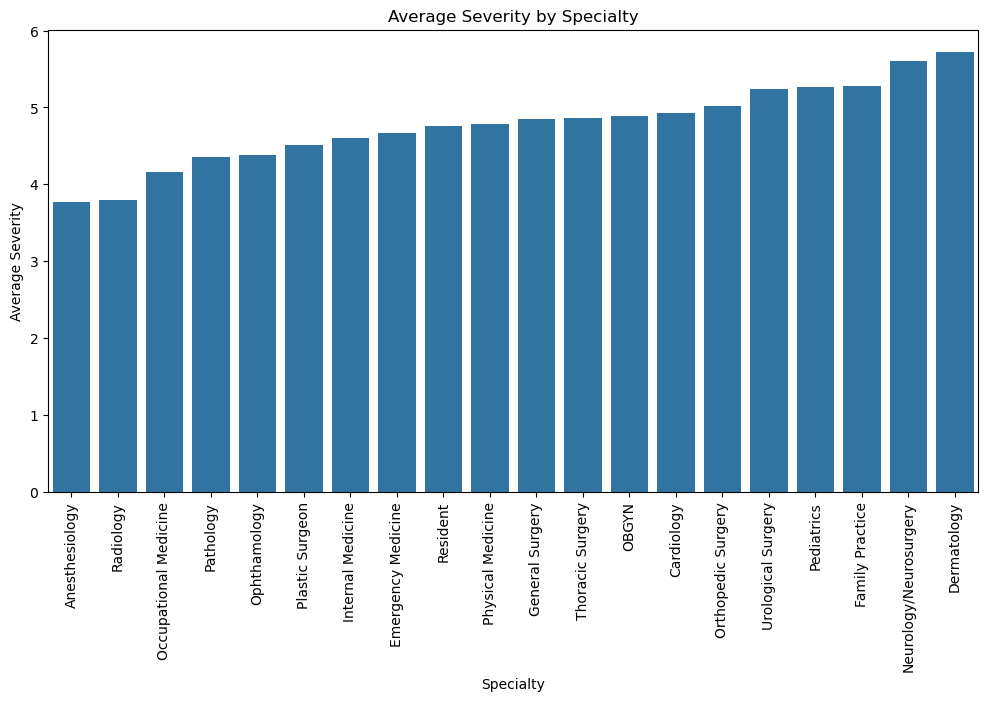

In [181]:
# Average severity for each Specialty
df["Severity"] = pd.to_numeric(df["Severity"], errors="coerce")  # Convert to numeric, setting errors to NaN

plt.figure(figsize=(12, 6))
df_grouped = df.groupby("Specialty")["Severity"].mean().sort_values()
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xticks(rotation=90)
plt.title("Average Severity by Specialty")
plt.xlabel("Specialty")
plt.ylabel("Average Severity")
plt.show()

Key insights:
    - Different medical specialties show varying average severity levels.
    - Dermatology, Neurology/Neurosurgery, and Family Practice have the highest severity ratings, while Anesthesiology and Radiology have the lowest.
    - This suggests that certain specialties deal with more severe cases on average, likely due to the nature of the conditions they treat.

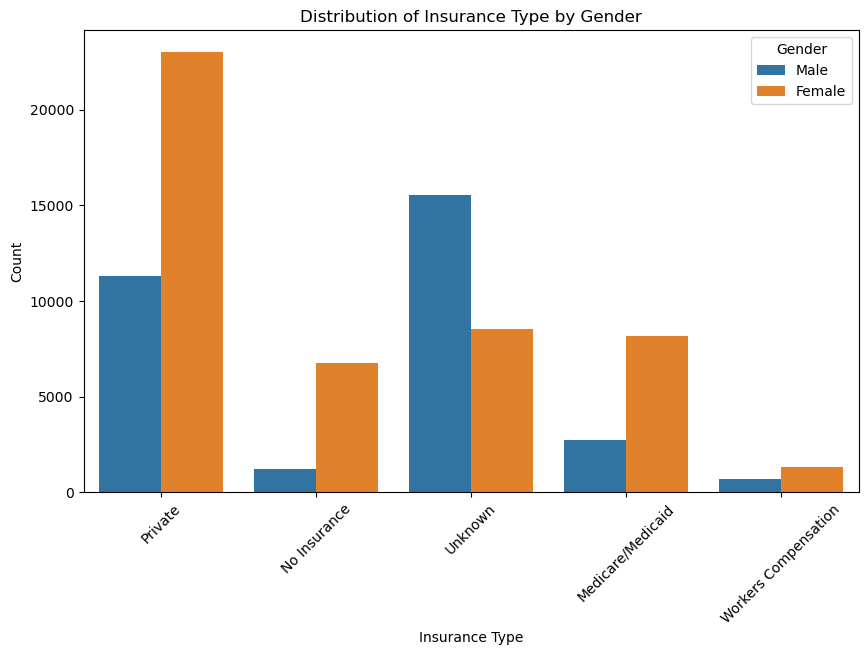

In [183]:
# Count each insurance type by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Insurance"], hue=df["Gender"])
plt.xticks(rotation=45)
plt.title("Distribution of Insurance Type by Gender")
plt.xlabel("Insurance Type")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

Key Insights:
    - Private Insurance Dominance: Both genders rely heavily on private insurance (tallest bars).
Gender Disparities:
    - Males lead in "No Insurance" and "Workers Compensation" (possibly due to occupational risks).
    - Females have higher counts in "Medicare/Medicaid" (may reflect caregiving roles, older age, or socioeconomic factors).
Weak Representation: "Unknown" insurance is minimal, suggesting good data quality.

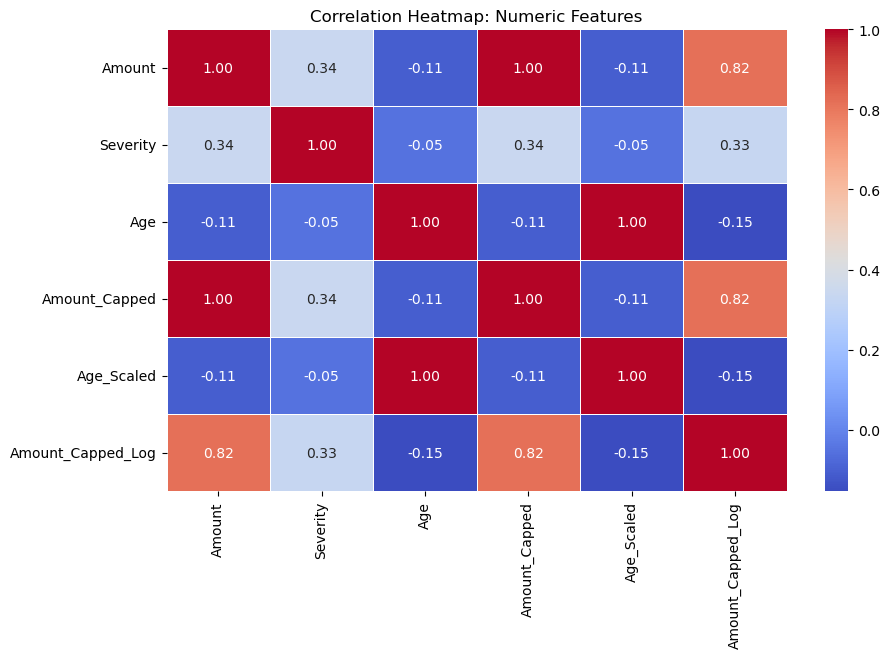

In [211]:
# Compute correlation matrix for Age, Severity and Other factors
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Numeric Features")
plt.show()

# Extracting specific correlations
severity_age_corr = correlation_matrix.loc["Severity", "Age"]
severity_amount_corr = correlation_matrix.loc["Severity", "Amount"]


1. A positive value indicates a positive correlation, meaning as one variable increases, the other tends to increase.
2. A negative value suggests an inverse relationship.
3. The closer the value is to 1 or -1, the stronger the correlation.
4. Starting with Severity and Age_Scaled, the correlation is -0.05. 
    - That's very close to zero, which implies there's almost no linear relationship between these two variables.
    - So, the age of patients doesn't seem to affect the severity much, or vice versa.
5. Severity and Amount_Capped_Log have a correlation of 0.33.
    - That's a moderate positive correlation.
    - This suggests that as the Amount increases, the Severity tends to increase as well, but the relationship isn't very strong.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [275]:
# Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

# Inverse transform the predictions
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

# Evaluate in real-world units
print("Linear Regression Performance (Original Scale):")
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_actual))
print("R^2 Score:", r2_score(y_test_actual, y_pred_actual))

Linear Regression Performance (Original Scale):
RMSE: 190758.11967051894
MAE: 106860.77786201327
R^2 Score: 0.016219556769140886


In [277]:
# RandomForestRegressor Model
# Label Encoding for binary categorical columns (Private Attorney, Gender)
label_encoder = LabelEncoder()
df['Private Attorney'] = label_encoder.fit_transform(df['Private Attorney'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Label Encoding for 'Age_Group' (if it's categorical)
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])

# Drop non-numeric columns (if any are still left)
df = df.select_dtypes(include=[int, float])  # Keeps only numeric columns

# Split features and target
X = df.drop(['Amount', 'Amount_Capped', 'Amount_Capped_Log'], axis=1)
y = df['Amount_Capped_Log']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf_log = rf.predict(X_test_scaled)

# Inverse the log transformation (exponential function)
y_pred_rf = np.exp(y_pred_rf_log)  # Convert predicted log values back to original scale
y_test_exp = np.exp(y_test)        # Convert actual test values back to original scale

# Calculate MSE, MAE, RMSE, and R² on the original scale (dollars)
mse_rf = mean_squared_error(y_test_exp, y_pred_rf)  # Mean Squared Error
rmse_rf = np.sqrt(mse_rf)  # RMSE = sqrt(MSE)
mae_rf = mean_absolute_error(y_test_exp, y_pred_rf)
r2_rf = r2_score(y_test_exp, y_pred_rf)

# Output the results in dollars
print("Random Forest Regressor Performance (in dollars):")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R^2 Score: {r2_rf}")

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for easier viewing
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort and print top 10 features
top_10 = feature_importances.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 Features by Importance:")
print(top_10)


Random Forest Regressor Performance (in dollars):
RMSE: 151934.04767021225
MAE: 85507.55964662333
R^2 Score: 0.3759170250291156
Top 10 Features by Importance:
            Feature  Importance
0          Severity    0.328812
2  Private Attorney    0.296593
3            Gender    0.255299
1               Age    0.059994
4        Age_Scaled    0.058382
5         Age_Group    0.000920


In [279]:
# Tuned RandomForestRegressor Model
# Label Encoding for binary categorical columns (Private Attorney, Gender)
label_encoder = LabelEncoder()
df['Private Attorney'] = label_encoder.fit_transform(df['Private Attorney'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Label Encoding for 'Age_Group'
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])

# Drop non-numeric columns
df = df.select_dtypes(include=[int, float])  # Keeps only numeric columns

# Split features and target
X = df.drop(['Amount', 'Amount_Capped', 'Amount_Capped_Log'], axis=1)
y = df['Amount_Capped_Log']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],               # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples required at each leaf node
    'bootstrap': [True, False]                      # Whether bootstrap samples are used when building trees
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_rf_log = best_rf_model.predict(X_test_scaled)

# Inverse the log transformation
y_pred_rf = np.exp(y_pred_rf_log)  # Convert predicted log values back to original scale
y_test_exp = np.exp(y_test)        # Convert actual test values back to original scale

# Calculate MSE, MAE, RMSE, and R² on the original scale (dollars)
mse_rf = mean_squared_error(y_test_exp, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # RMSE = sqrt(MSE)
mae_rf = mean_absolute_error(y_test_exp, y_pred_rf)
r2_rf = r2_score(y_test_exp, y_pred_rf)

# Output the results in dollars
print("Random Forest Regressor Performance (Tuned, in dollars):")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R^2 Score: {r2_rf}")

# Get feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for easier viewing
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort and print top 10 features
top_10 = feature_importances.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 Features by Importance:")
print(top_10)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Forest Regressor Performance (Tuned, in dollars):
RMSE: 151222.38895307435
MAE: 84914.90625051214
R^2 Score: 0.3817497390868524
Top 10 Features by Importance:
            Feature  Importance
0          Severity    0.331212
2  Private Attorney    0.303741
3            Gender    0.263431
1               Age    0.053301
4        Age_Scaled    0.047584
5         Age_Group    0.000730


In [281]:
# XGBRegressor Model
# Fit the XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_xgb_log = xgb_reg.predict(X_test)

# Inverse the log transformation to get predictions in the original scale (dollars)
y_pred_xgb = np.exp(y_pred_xgb_log)  # Convert predicted log values back to original scale
y_test_exp = np.exp(y_test)          # Convert actual test values back to original scale

# Calculate MSE, MAE, RMSE, and R² on the original scale (dollars)
mse = mean_squared_error(y_test_exp, y_pred_xgb)
rmse = np.sqrt(mse)  # RMSE = sqrt(MSE)
mae = mean_absolute_error(y_test_exp, y_pred_xgb)
r2 = r2_score(y_test_exp, y_pred_xgb)

# Output the results in dollars
print("XGBoost Regressor Performance (in dollars):")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")


XGBoost Regressor Performance (in dollars):
RMSE: 151575.1242860908
MAE: 85206.15773571636
R^2 Score: 0.3788621633244391


In [293]:
# Ridge Regression (L2 Regularization) 
# Fit the Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict on the test set (log scale)
y_pred_ridge_log = ridge.predict(X_test_scaled)

# Inverse log1p transformation to get values in original scale (dollars)
y_pred_ridge = np.expm1(y_pred_ridge_log)
y_test_exp = np.expm1(y_test)

# Calculate metrics in original scale
mse_ridge = mean_squared_error(y_test_exp, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test_exp, y_pred_ridge)
r2_ridge = r2_score(y_test_exp, y_pred_ridge)

# Print results
print("Ridge Regression Performance (in dollars):")
print(f"RMSE: {rmse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"R^2 Score: {r2_ridge}")


Ridge Regression Performance (in dollars):
RMSE: 190758.2184805829
MAE: 106860.64267003929
R^2 Score: 0.01621853759958869


In [295]:
# Lasso Regression(L1 Regularization)
# Train the Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lasso_log = lasso.predict(X_test_scaled)

# Inverse transform to original dollar scale
y_pred_lasso = np.expm1(y_pred_lasso_log)
y_test_exp = np.expm1(y_test)

# Calculate evaluation metrics in original scale
mse_lasso = mean_squared_error(y_test_exp, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test_exp, y_pred_lasso)
r2_lasso = r2_score(y_test_exp, y_pred_lasso)

# Output results
print("Lasso Regression Performance (in dollars):")
print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"R^2 Score: {r2_lasso}")


Lasso Regression Performance (in dollars):
RMSE: 194552.02940294432
MAE: 105561.33826626392
R^2 Score: -0.02330159212671612


In [301]:
# ElasticNet(L1 + L2) model
# Train ElasticNet model
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)

# Predict on test set (in log1p scale)
y_pred_elastic_log = elastic.predict(X_test_scaled)

# Convert predictions and true values back to dollar scale
y_pred_elastic = np.expm1(y_pred_elastic_log)
y_test_exp = np.expm1(y_test)

# Calculate evaluation metrics
mse_elastic = mean_squared_error(y_test_exp, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
mae_elastic = mean_absolute_error(y_test_exp, y_pred_elastic)
r2_elastic = r2_score(y_test_exp, y_pred_elastic)

# Print metrics
print("ElasticNet Regression Performance (in dollars):")
print(f"RMSE: {rmse_elastic}")
print(f"MAE: {mae_elastic}")
print(f"R^2 Score: {r2_elastic}")


ElasticNet Regression Performance (in dollars):
RMSE: 193102.0652027098
MAE: 105611.22465399778
R^2 Score: -0.008105435041295017


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

1. Why We Did This(Purpose):
The goal of this analysis was to see how well different models can predict how much a medical malpractice claim might pay out (amount_capped_log). We tested several models to find out which one gives the most accurate and reliable results.

2. How We Measured Performance
    - We used three key metrics, all in real dollar amounts so they're easy to understand:
    - RMSE (Root Mean Squared Error): Think of this as the average size of our prediction errors – the lower, the better.
    - MAE (Mean Absolute Error): The average amount we were off by, in dollars.
    - R² Score: Tells us how much of the variation in payout amounts the model can explain – closer to 1 is better.
    - We trained each model on 80% of the data and tested it on the remaining 20%. For the Random Forest (Tuned), we also used 5-fold cross-validation to make sure we were choosing the best settings.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


- Final Model: Random Forest Regressor (Tuned)
Purpose:
    - After testing various models, the Tuned Random Forest Regressor came out on top for predicting medical malpractice claim payouts. This section will walk you through why this model was chosen and highlight its final performance.

Why Choose Random Forest Regressor (Tuned)?
    - While we explored models like Linear Regression, Ridge, Lasso, and ElasticNet, the Random Forest Regressor performed the best. Here’s why we decided to go with it:
    - It Handles Complexity Well: Random Forest is great at capturing complex, non-linear relationships between features. This was key for our dataset, where simpler models like linear regression weren’t able to fully capture the intricacies of how different factors (like severity, attorney, etc.) affect claim payouts.
    - Understanding Feature Importance: One of the best things about Random Forest is how it shows us which features are the most important. For instance, features like Severity, Private Attorney, and Gender had the biggest impact on predictions, which made perfect sense given what we know about these factors in malpractice claims.
    - Improved Performance with Tuning: By fine-tuning the model using GridSearchCV, we were able to boost its performance. This gave us even more confidence that Random Forest is the right choice for this problem.

Final Model Configuration:
    - Base Configuration:
        - n_estimators (Number of trees): 100
        - max_depth (Tree depth): None (letting trees grow until they have fewer than the minimum samples required to split further)
        - min_samples_split (Minimum samples to split a node): 2
        - min_samples_leaf (Minimum samples at each leaf node): 1
        - bootstrap: True (using bootstrapped samples for tree building)

    - Tuning Parameters:
        - We used GridSearchCV to test different combinations of the following:
        - n_estimators: 100, 200, 300
        - max_depth: None, 10, 20, 30
        - min_samples_split: 2, 5, 10
        - min_samples_leaf: 1, 2, 4
        - bootstrap: True, False

After evaluating all these combinations, we selected the best-performing set of parameters based on how well the model reduced error (using negative mean squared error as our evaluation metric).

Performance of the Final Model:
Here’s how the Tuned Random Forest Regressor performed in terms of predicting claim payouts in the original scale (dollars):
    - RMSE (Root Mean Squared Error): $151,222
    - MAE (Mean Absolute Error): $84,914
    - R² (R-Squared): 0.382

These results show that the model is doing a solid job with relatively low error rates. The R² score of 0.382 means that the model is able to explain around 38% of the variability in claim amounts, which is great for this type of prediction task.

Top 5 Important Features:
One of the great things about Random Forest is that it gives us insight into which features are most important for predicting claim payouts. Here are the top 5 features driving our model:
    - Severity of the case – This is the most influential factor when predicting the payout amount.
    - Private Attorney – Whether the claimant had a private attorney was also a key factor.
    - Gender – Gender played a significant role in the predictions.
    - Age – The age of the claimant had an impact, although not as strong as severity or attorney type.
    - Age_Scaled – A scaled version of age, still important, but a bit less so than the raw age and other features.

Why This Model?
1. Best Performance: Among all the models tested, Tuned Random Forest Regressor performed the best in terms of minimizing errors and providing the most accurate predictions.
2. Flexibility: Random Forest is highly flexible and can capture the complex relationships between features. This made it especially useful for this dataset, where multiple variables interact in unpredictable ways.
3. Transparency: While Random Forest is a bit more complex than linear models, it’s still interpretable. The feature importance metrics give us valuable insights into which factors most impact the payout amounts, which is something other models didn’t provide as clearly.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

Kaggle : http://kaggle.com/datasets/gabrielsantello/medical-malpractice-insurance-dataset?resource=download

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
Mohola Motshabi Hope
